# Understanding Descriptive Statistics

Import the necessary libraries here:

In [144]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [27]:
dice = np.random.randint(1,6, size=10)
dice = pd.DataFrame(dice, columns=['Roll'])
dice

,Roll
0,2
1,3
2,5
3,5
4,3
5,3
6,5
7,5
8,4
9,3


#### 2.- Plot the results sorted by value.

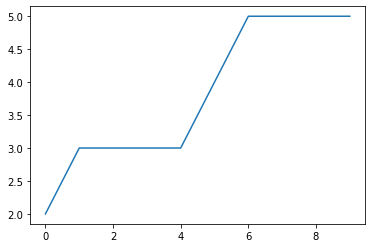

In [67]:
sorted_dice = dice.sort_values('Roll').reset_index(drop= True)
plt.plot(sorted_dice['Roll'])

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

In [29]:
dice.value_counts()

Roll
5       4
3       4
4       1
2       1
dtype: int64

array([[<AxesSubplot:title={'center':'Roll'}>]], dtype=object)

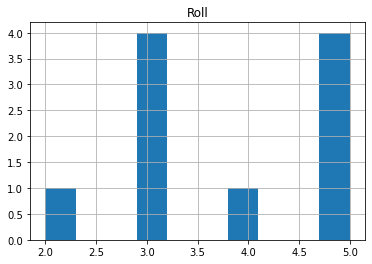

In [30]:
# The best way to show the frequency distribution is the histogram or the boxplot. In this case I am gonna use the histogram.
# Apart for not being sure of what's being asked to plot above, I can imagine that the answer is that the histogram is a much better 
# way of representing the frequency distribution of an array, because the values that are repeated are not shown multiple times but summed.
# Because of the small sample (10) of times rolled, the distribution of the values is not even at all, but if we roll it much more time 
# we should get a much more even histogram were all values are repeated more or less evenly.

dice.hist()

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [31]:
def mean(dataframe):
    return np.sum(dataframe)/len(dataframe)

mean(dice)

Roll    3.8
dtype: float64

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [84]:

dice_freqd = pd.DataFrame(dice.value_counts()).reset_index()
dice_freqd['Total'] = dice_freqd['Roll']*dice_freqd[0]

mean_ = np.sum(dice_freqd['Total'])/np.sum(dice_freqd[0])
mean_

# Not sure how to turn this into a function...


3.8

#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [78]:
def median_calculator(dataframe):
    if (len(dataframe) % 2) == 0:
        return (float(np.sort(dataframe)[int((len(dataframe)/2)-1)]) + float(np.sort(dataframe)[int(len(dataframe)/2)]))/2
    else:
        return (np.sort(dataframe)[len(dataframe)])/2

median_calculator(sorted_dice)

3.5

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [99]:
def first_q_calculator(dataframe):
    if ((len(dataframe)/2) % 2) == 0:
        return (float(np.sort(dataframe)[int((len(dataframe)/4)-1)]) + float(np.sort(dataframe)[int(len(dataframe)/4)]))/2
    else:
        return (float(np.sort(dataframe)[int(len(dataframe)/4)-1]))

first_q_calculator(sorted_dice)

3.0

In [100]:
def third_q_calculator(dataframe):
    if ((len(dataframe)/2) % 2) == 0:
        return (float(np.sort(dataframe)[int(((len(dataframe)/4)*3)-1)]) + float(np.sort(dataframe)[int((len(dataframe)/4)*3)]))/2
    else:
        return (float(np.sort(dataframe)[int((len(dataframe)/4)*3)-1]))

third_q_calculator(sorted_dice)

5.0

## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

<AxesSubplot:>

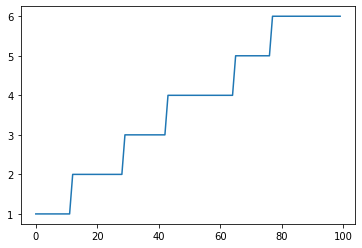

In [132]:
roll_hundr = pd.read_csv('C:/Users/Asier/Desktop/Ironhack/Labs/Labs_week_4/Descriptive-Stats/data/roll_the_dice_hundred.csv')
roll_hundr_sort = roll_hundr['value'].sort_values().reset_index(drop= True)
roll_hundr_sort.plot()

In [ ]:
"""
We can see that the values for each number from the dice are more or less same length... Cannot really get proper insights
fro this plot... lol
"""

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [122]:
mean(roll_hundr['value'])

3.74

#### 3.- Now, calculate the frequency distribution.


In [124]:
roll_hundr['value'].value_counts()

6    23
4    22
2    17
3    14
5    12
1    12
Name: value, dtype: int64

#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

<AxesSubplot:>

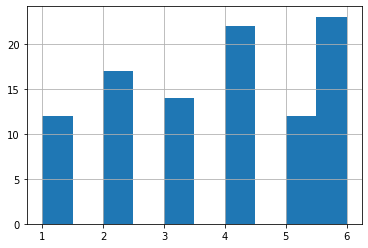

In [125]:
roll_hundr['value'].sort_values().hist()

In [ ]:
"""
We can see that the distribution of the values obtained when rolling the dices is not much even, but is more even than 
the results we got when we rolled the dice only 10 times. We have more even values (2,4,6) than uneven. This might be 
because rolling the dice 100 times might not be enough big sample to get all the values evenly spread.
"""

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

<AxesSubplot:>

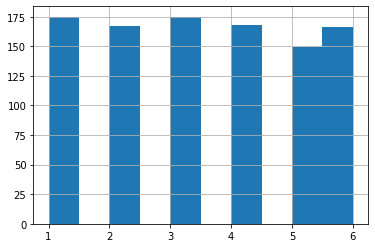

In [134]:
roll_hundr = pd.read_csv('C:/Users/Asier/Desktop/Ironhack/Labs/Labs_week_4/Descriptive-Stats/data/roll_the_dice_thousand.csv')
roll_hundr_sort = roll_hundr['value'].sort_values().reset_index(drop= True)
roll_hundr_sort.hist()

In [ ]:
"""
Now we can see that the values obtained for each number of the dice are quite even, 
and they will keep getting more even as we roll the dice more times, that's the reason
why we have such an uneven distributions for smaller samples.
"""

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

<AxesSubplot:>

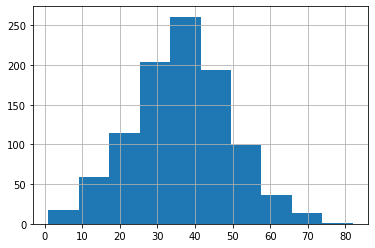

In [137]:
ages1 = pd.read_csv('C:/Users/Asier/Desktop/Ironhack/Labs/Labs_week_4/Descriptive-Stats/data/ages_population.csv')
ages1 = ages1['observation'].sort_values().reset_index(drop= True)
ages1.hist()

# By looking at the plot we can see that it's slightly positively skewed (to the rigth), which will make that the 
# mean will be around 30 and 40 years. And the median will be between 40 and 50. 
# About the standard deviation, I think that 68% of the values fall between 20 - 50, and that's 2 standard
# deviations (one std away from the mean in both directions), so dividing (50-20)/2 = 15. I think
# the std deviation will be approximately 15.

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [138]:
print('Mean : ', np.mean(ages1))
print('Std. deviation: ', np.sqrt(np.var(ages1)))

Mean :  36.56
Std. deviation:  12.810089773299797


In [ ]:
"""
The mean falls more or less inside my guess, the std deviation too, a bit shorter of what I estimated.
"""

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

<AxesSubplot:>

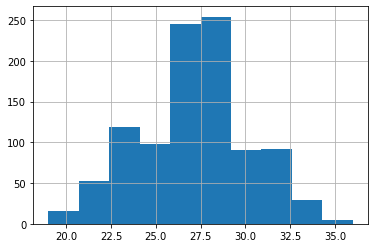

In [140]:
ages2 = pd.read_csv('C:/Users/Asier/Desktop/Ironhack/Labs/Labs_week_4/Descriptive-Stats/data/ages_population2.csv')
ages2 = ages2['observation'].sort_values().reset_index(drop= True)
ages2.hist()

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [ ]:
"""
The ages are distributed a bit differently on this case. In this case the maximum age doesn't go above 40 years,
and the minimum doesn't go below 20 either. We can say that the plot is pretty simmetrycal. We can also say that 
the kurtosis of this graph is leptokurtik.
"""

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [141]:
print('Mean : ', np.mean(ages2))
print('Std. deviation: ', np.sqrt(np.var(ages2)))

Mean :  27.155
Std. deviation:  2.9683286543103677


In [ ]:
"""
The mean is way lower, because the values in this dataset are also lower, as we said the maximum age is around 35 years old.
Because of the low variance too (and most of the values being concentrated around 27.5), the std deviation might be so lower as well.
"""

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

<AxesSubplot:>

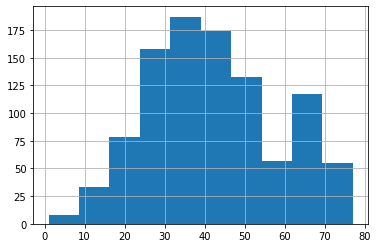

In [142]:
ages3 = pd.read_csv('C:/Users/Asier/Desktop/Ironhack/Labs/Labs_week_4/Descriptive-Stats/data/ages_population3.csv')
ages3 = ages3['observation'].sort_values().reset_index(drop= True)
ages3.hist()

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [143]:
print('Mean : ', np.mean(ages3))
print('Std. deviation: ', np.sqrt(np.var(ages3)))

Mean :  41.989
Std. deviation:  16.136631587788077


In [ ]:
"""
The mean is higher again, this time ages vary from 0 to 80, so that is one of the main reasons. Also, we have a big
part of the population between ages of 60 and 70 years, that influences the mean and makes it higher. The std deviation
is higher than the one in 'ages1' file, this is because the values are more spread and the frequency distribution
histogram being 'platykurtic' (flatter than the previous ones). Lastly, interesting to point out that this distribution
is not symmetrical like the ones before that they were quite symmetrical.
"""

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [146]:
q1 = np.quantile(ages3, 0.25)

print('the first quartile is, ', q1)

median = np.quantile(ages3, 0.5)

print('the median/second quartile is, ', median)           # The second quartile = median (always)

q3 = np.quantile(ages3, 0.75)

print('the third quartile is, ', q3)

the first quartile is,  30.0
the median/second quartile is,  40.0
the third quartile is,  53.0


In [ ]:
"""
The mean is slightly smaller than the median. This is because the frequency distr is negatively skewed (to the left).
"""

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [149]:
q15 = np.quantile(ages3, 0.15)

print('the 15th precentile is, ', q15)

q35 = np.quantile(ages3, 0.35)

print('the 35th precentile is, ', q35)           # The second quartile = median (always)

q85 = np.quantile(ages3, 0.85)

print('the 85th precentile is, ', q85)

the 15th precentile is,  25.0
the 35th precentile is,  34.0
the 85th precentile is,  64.0


In [147]:
"""
... (?)
"""

'\n(?)\n'

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""